# I. Import thư viện



In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive",force_remount=True)
%cd '/content/gdrive/My Drive/LDS0_DoanTanHuy_Online/Project1/'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS0_DoanTanHuy_Online/Project1


In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import squarify
from datetime import datetime

In [ ]:
!pip install pandas-profiling==2.8.0
!pip install pandas==1.2.5

# II. Đọc dữ liệu

In [ ]:
df=pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')

# III. Preprocessing

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Kiểm tra dữ liệu null
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
# Kiểm tra dữ liệu trùng 
df.duplicated().any()

True

In [ ]:
# Nhận xét 
# Có thể thấy cột CustomerID l và cột description có tồn tại giá trị null, ngoài ra 1 số giá trị ở UnitPrice & Quantity <0 
# Có tồn tại dòng chưa dữ liệu trùng
# Định dạng lại kiểu dữ liệu của cột InvoiceDate 
# => Loại bỏ các giá trị <0 ở 2 cột UnitPrice & Quantity, null values và dữ liệu trùng

In [ ]:
# Loại bỏ các giá trị <0 ở 2 cột UnitPrice và Quantity 
df=df[df.UnitPrice>0]
df=df[df.Quantity>0]
df.shape

(530104, 8)

In [ ]:
# Loại bỏ dữ liệu null và dữ liệu trùng
df.dropna(inplace=True)
df=df.drop_duplicates()
df.shape

(392692, 8)

In [ ]:
# Định dạng lại kiểu dữ liệu của Invoice Date 
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y %H:%M").date()
df['InvoiceDate'] = df['InvoiceDate'].apply(string_to_date)
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

# III. EDA

#### 1. Pandas Profiling

In [ ]:
#Lưu ý cần cài 2 bản pandas-profiling bản 2.8.0 và pandas 1.2.5 
#!pip install pandas-profiling==2.8.0
#!pip install pandas==1.2.5

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
#EDA using pandas-profiling
profile = ProfileReport(df,title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Tạo thêm cột Gross_sale là tổng giá trị đơn hàng 
df["Gross_sale"]=df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross_sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Đánh giá số lượng người mua theo customer ID trong khoảng thời gian ghi nhận
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print('{:,} unique customer_id'.format(len(df.CustomerID.unique())))


Transactions timeframe from 2010-12-01 00:00:00 to 2011-12-09 00:00:00
4,338 unique customer_id


#### 5 tháng có doanh thu cao nhất 

In [ ]:
# 5 tháng bán chạy nhất 
months=df.groupby('InvoiceDate').sum().sort_values(by='Gross_sale',ascending=False)[:5].reset_index()

In [ ]:
highest_revenue_months=months[['InvoiceDate','Gross_sale']].set_index('InvoiceDate')
highest_revenue_months

,Gross_sale
InvoiceDate,
2011-12-09,184329.66
2011-09-20,103377.68
2011-01-18,87559.21
2011-10-05,73975.57
2011-09-15,71926.69


Text(0.5, 0, 'Gross_sale')

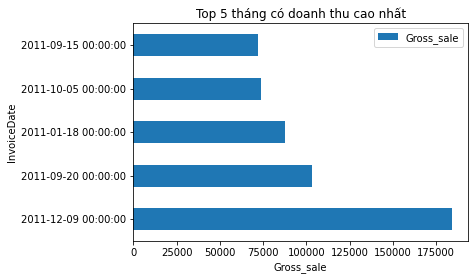

In [ ]:
ax = highest_revenue_months.plot.barh()
plt.title('Top 5 tháng có doanh thu cao nhất')
plt.xlabel('Gross_sale')

#### 5 mã sản phẩm bán chạy nhất

In [ ]:
# 5 mã sản phẩm bán chạy nhất 
items_id=df.groupby('StockCode').sum().sort_values(by='Gross_sale',ascending=False)[:5].reset_index()

In [ ]:
items_id

,StockCode,Quantity,UnitPrice,CustomerID,Gross_sale
0,23843,80995,2.08,16446.0,168469.60
1,22423,12374,21383.20,25637419.0,142264.75
2,85123A,36763,5852.07,31482068.0,100547.45
3,85099B,46078,3255.79,24700699.0,85040.54
4,23166,77916,241.62,3047321.0,81416.73


In [ ]:
highest_revenue_items=items_id[['StockCode','Gross_sale']].set_index('StockCode')
highest_revenue_items

,Gross_sale
StockCode,
23843,168469.60
22423,142264.75
85123A,100547.45
85099B,85040.54
23166,81416.73


Text(0.5, 0, 'Gross_sale')

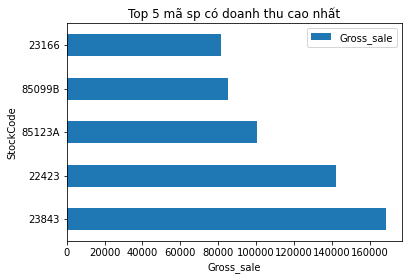

In [ ]:
ax1 = highest_revenue_items.plot.barh()
plt.title('Top 5 mã sp có doanh thu cao nhất')
plt.xlabel('Gross_sale')

In [ ]:
# Top 10 quốc gia mua nhiều nhất 
countries=df.groupby('Country').sum().sort_values(by='Gross_sale',ascending=False)[:10].reset_index()

In [ ]:
highest_revenue_countries=countries[['Country','Gross_sale']]
highest_revenue_countries

,Country,Gross_sale
0,United Kingdom,7.285025e+06
1,Netherlands,2.854463e+05
2,EIRE,2.652625e+05
3,Germany,2.286784e+05
4,France,2.089343e+05
5,Australia,1.384538e+05
6,Spain,6.155856e+04
7,Switzerland,5.644395e+04
8,Belgium,4.119634e+04
9,Sweden,3.836783e+04


#### 10 quốc gia đem lại doanh thu cao nhất 

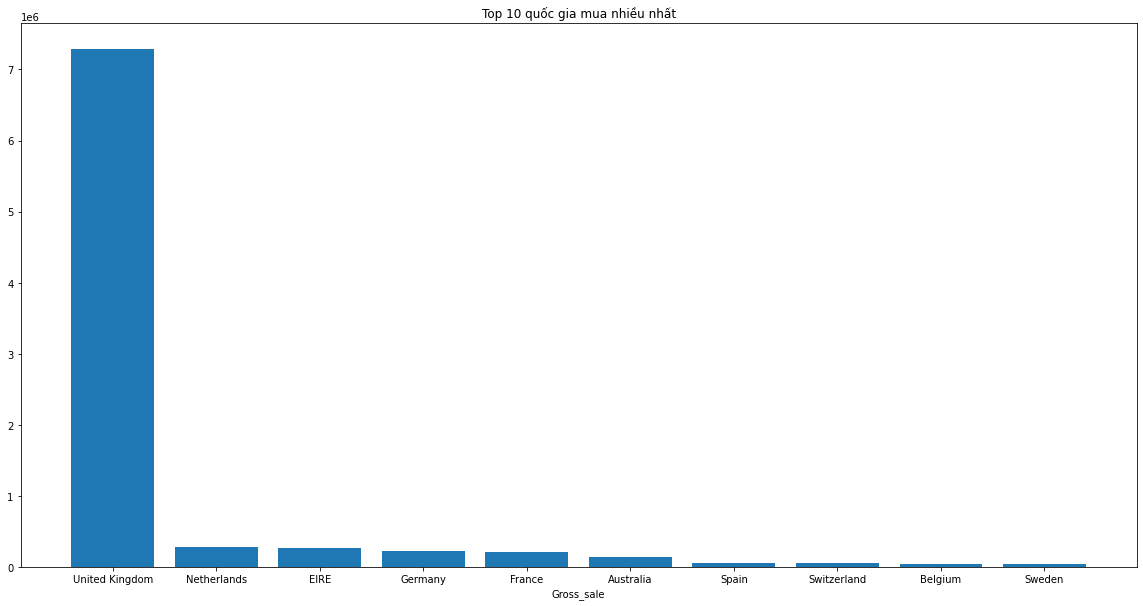

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(highest_revenue_countries['Country'],highest_revenue_countries['Gross_sale'])
plt.title('Top 10 quốc gia mua nhiều nhất')
plt.xlabel('Gross_sale')
plt.show()

# IV. Build models 

#### RFC

In [ ]:
# RFC 
# Convert string to date, get max of date of dataframe
max_date = df['InvoiceDate'].max().date()
Recency = lambda x: (max_date - x.max().date()).days
Frequency = lambda x: len(x.unique())
Monetary = lambda x: round(sum(x),2)
df_RFM=df.groupby('CustomerID').agg({'InvoiceDate': Recency,
                                     'InvoiceNo':Frequency,
                                     'Gross_sale':Monetary})

In [ ]:
df_RFM.head()

,InvoiceDate,InvoiceNo,Gross_sale
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [ ]:
# Điều chỉnh lại tên các cột
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Sort dữ liệu cột Monetary
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [ ]:
df_RFM.shape

(4338, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

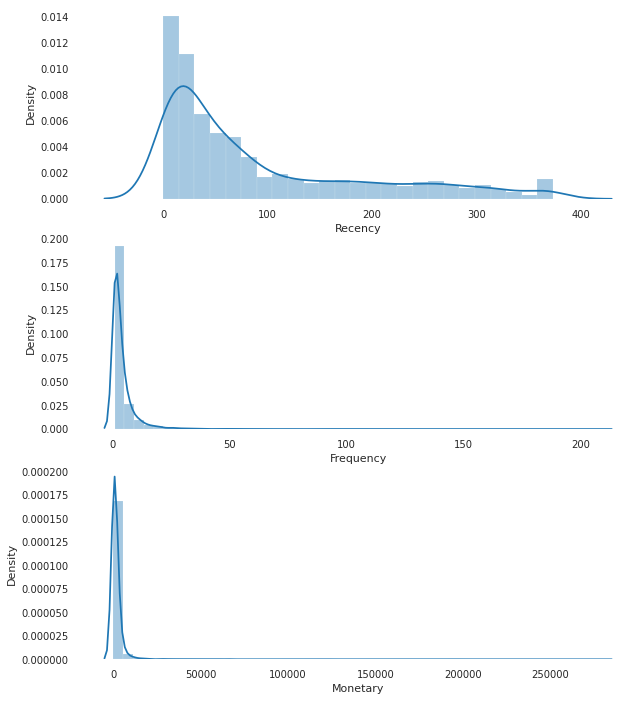

In [ ]:
### Visualization
plt.figure(figsize=(10,12))
plt.subplot(3, 1, 1)
sns.distplot(df_RFM['Recency'])# Plot distribution of R
plt.subplot(3, 1, 2)
sns.distplot(df_RFM['Frequency'])# Plot distribution of F
plt.subplot(3, 1, 3)
sns.distplot(df_RFM['Monetary']) # Plot distribution of M
plt.show()

In [ ]:
# Frequency, Recency và Monetary có xu hướng lệch phải (Right-skewed)
# - Recency: Đơn hàng chủ yếu phát sinh tập trung chủ yếu trong khoảng 1 tháng đổ lại 
# - Frequency: khách hàng tập trung chủ yếu trong khoảng 0-25 thể hiện số lượng giao dịch khá thấp => ít khách hàng loyal
# - Monetary: mức chi tiêu của khách hàng tập trung trong khoảng 0-10000 

In [ ]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [ ]:
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)
 
m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [ ]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
14646.0,1,73,280206.02,4,4,4
18102.0,0,60,259657.30,4,4,4
17450.0,8,46,194390.79,4,4,4
16446.0,0,2,168472.50,4,2,4
14911.0,1,201,143711.17,4,4,4


In [ ]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
14646.0,1,73,280206.02,4,4,4,444
18102.0,0,60,259657.30,4,4,4,444
17450.0,8,46,194390.79,4,4,4,444
16446.0,0,2,168472.50,4,2,4,424
14911.0,1,201,143711.17,4,4,4,444


In [ ]:
# Count number of unique segments
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

62


In [ ]:
# Sẽ có 62 nhóm nếu theo RFM_Segment => Cần một cách chia khác vì việc chia 62 nhóm là không cần thiết

In [ ]:
# Calculate RFM Score & level
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
14646.0,1,73,280206.02,4,4,4,444,12
18102.0,0,60,259657.30,4,4,4,444,12
17450.0,8,46,194390.79,4,4,4,444,12
16446.0,0,2,168472.50,4,2,4,424,10
14911.0,1,201,143711.17,4,4,4,444,12


In [ ]:
# Ở đây chúng ta phân thành các nhóm theo các tiêu chuẩn như sau 
# STARS: Với RFM_Score>=11 đại diện cho nhóm có mức chi tiêu cao với tần suất cao và phát sinh đơn hàng gần đây 
# NEW: Với R>=3 đại diện cho số lần mua gần đây nhất nhưng F+M<=4 cho thấy tần suất giá trị đơn hàng trung bình 
# LOST: Với R=1 cho thấy số lần mua gần đây nhất rất xa cùng với F+M <=3 (cho thấy tần suất mua thấp với giá trị đơn hàng thấp)
# Những trường hợp còn lại sẽ được liệt kê vào mục REGULARS

def rfm_level(df):
    if (df['RFM_Score'] >=11)  :
        return 'STARS'
    
    elif (df['R'] >= 3 and df['RFM_Score'] <=10):
        return 'NEW'
    
    else:     
        if (df['R'] == 1 and df['RFM_Score']<=4):
            return 'LOST'

        return 'REGULARS'

In [ ]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [ ]:
df_RFM['RFM_Level'].value_counts()

REGULARS    1492
NEW         1296
STARS        873
LOST         677
Name: RFM_Level, dtype: int64

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,LOST,264.0,1.0,248.0,677,15.61
1,NEW,24.0,3.0,925.0,1296,29.88
2,REGULARS,120.0,3.0,1105.0,1492,34.39
3,STARS,13.0,12.0,6726.0,873,20.12




TREEMAP

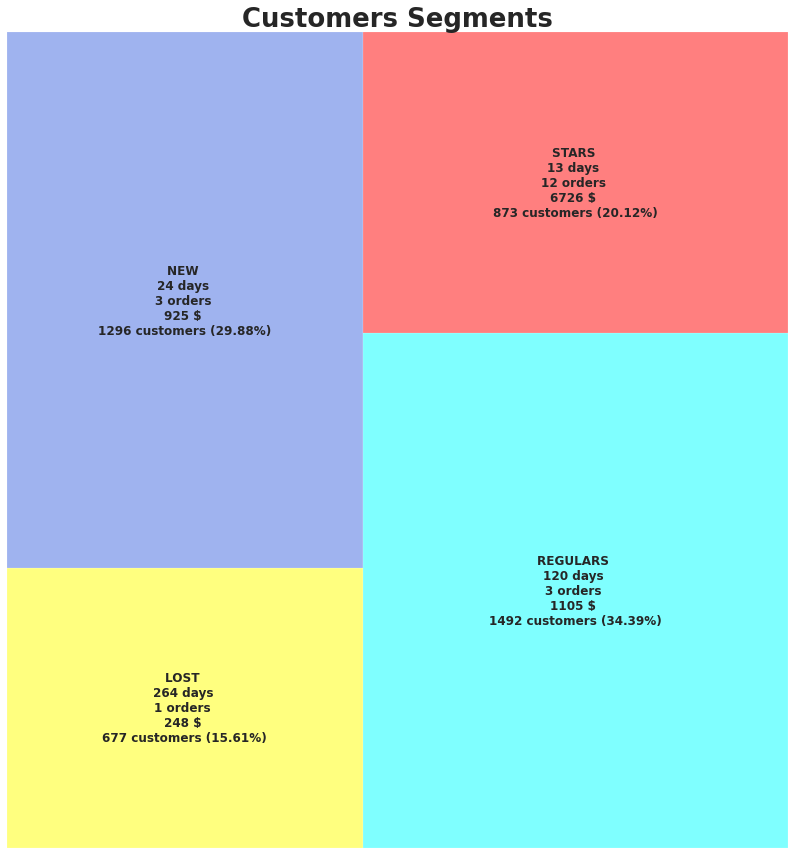

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 15)

colors_dict = {'STARS':'yellow','NEW':'royalblue', 'REGULAR':'cyan','LOST':'red'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()



Scatter Plot (RFM)

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(rfm_agg,x='RecencyMean',y='MonetaryMean',size='FrequencyMean',color='RFM_Level',
                hover_name='RFM_Level',size_max=100)
fig.show()

3D Scatter Plot (RFM)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(df_RFM,x='Recency',y='Frequency',z='Monetary',
                  color='RFM_Level',opacity=0.5,
                  color_discrete_map=colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

#### K-Means

In [ ]:
df_clustering=df.groupby('CustomerID').agg({'InvoiceDate': Recency,
                                     'InvoiceNo':Frequency,
                                     'Gross_sale':Monetary})
df_clustering.columns = ['recency', 'frequency', 'monetary']

In [ ]:
df_clustering.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [ ]:
df_clustering.head().describe()

,recency,frequency,monetary
count,5.000000,5.000000,5.000000
mean,146.000000,2.800000,17076.558000
std,158.979558,2.683282,33631.350405
min,2.000000,1.000000,334.400000
25%,18.000000,1.000000,1757.550000
50%,75.000000,1.000000,1797.240000
75%,310.000000,4.000000,4310.000000
max,325.000000,7.000000,77183.600000


In [ ]:
# Có sự khác biệt giữa mean và std giữa các cột nên ta áp dụng StandardScaler

In [ ]:
df_sc=df_clustering.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sc)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

In [ ]:
df_scaled

,recency,frequency,monetary
CustomerID,,,
12346.0,2.329388,-0.425097,8.363010
12347.0,-0.900588,0.354417,0.251699
12348.0,-0.170593,-0.035340,-0.027988
12349.0,-0.740589,-0.425097,-0.032406
12350.0,2.179389,-0.425097,-0.190812
...,...,...,...
18280.0,1.849392,-0.425097,-0.207931
18281.0,0.879399,-0.425097,-0.219037
18282.0,-0.850588,-0.295178,-0.208214


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer

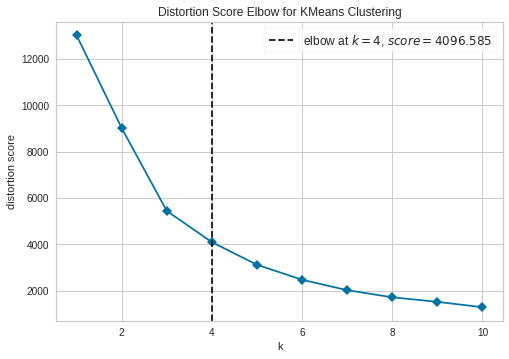

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()   

In [ ]:
# Chọn k=4 
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,recency,frequency,monetary
0,-0.485724,-0.080065,-0.078391
1,-0.769357,2.309357,1.156075
2,1.561128,-0.353464,-0.175004
3,-0.854435,10.168289,13.928825


In [ ]:
model.cluster_centers_

array([[-0.03806662, -0.2611788 , -0.13048481],
       [-0.63371508,  4.29258294,  7.20421909],
       [ 2.16378204, -0.38854038, -0.18341341],
       [-0.72776021,  0.72799138,  0.20586824],
       [-0.89808813,  5.32381408, 24.89182129],
       [-0.915588  , 26.07835567,  9.60948605],
       [ 1.01676264, -0.3149288 , -0.14830101],
       [-0.81734799,  2.67611536,  1.06272882],
       [-0.67534219, -0.17867427, -0.11539933],
       [-0.90725473, 11.41917502,  3.69177302]])

In [ ]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
df_scaled['label']=kmeans.labels_
df_scaled

,recency,frequency,monetary,label
CustomerID,,,,
12346.0,2.329388,-0.425097,8.363010,1
12347.0,-0.900588,0.354417,0.251699,0
12348.0,-0.170593,-0.035340,-0.027988,0
12349.0,-0.740589,-0.425097,-0.032406,0
12350.0,2.179389,-0.425097,-0.190812,2
...,...,...,...,...
18280.0,1.849392,-0.425097,-0.207931,2
18281.0,0.879399,-0.425097,-0.219037,2
18282.0,-0.850588,-0.295178,-0.208214,0


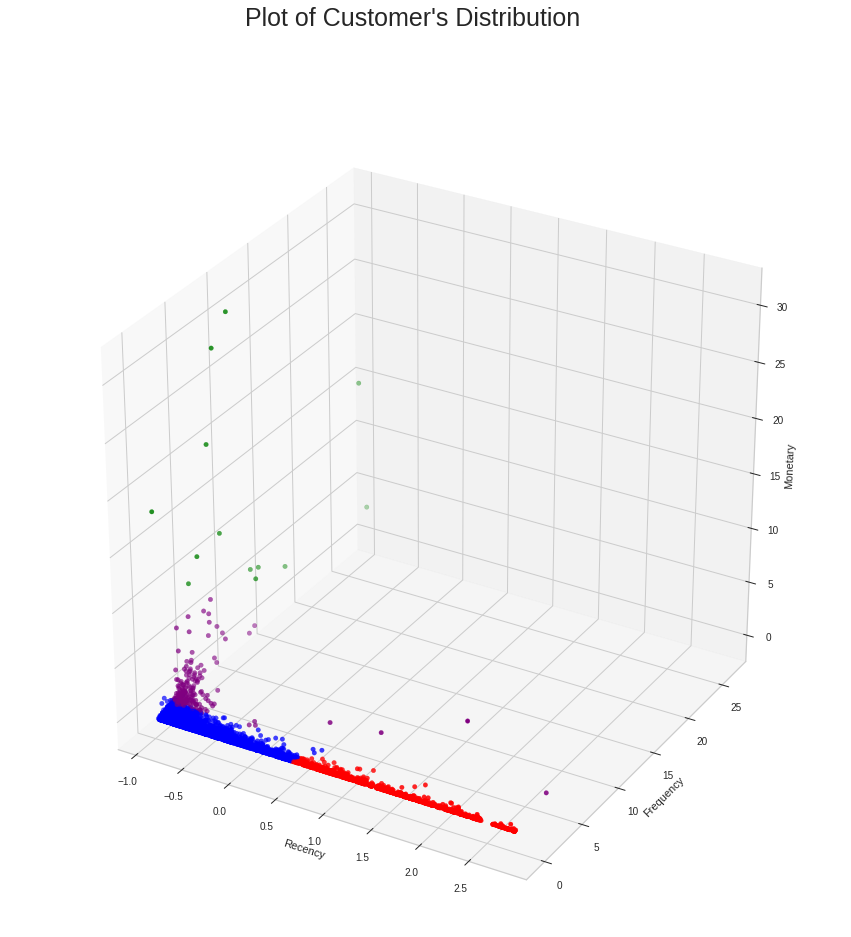

In [ ]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_scaled["recency"], df_scaled["frequency"], df_scaled["monetary"], marker='o', c=colors[df_scaled["label"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
# Các phân nhóm có sự tách biệt khá rõ ràng 

In [ ]:
df_segment=df_clustering.copy()

In [ ]:
df_segment['label']=kmeans.labels_

In [ ]:
df_segment

,recency,frequency,monetary,label
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,310,1,334.40,2
...,...,...,...,...
18280.0,277,1,180.60,2
18281.0,180,1,80.82,2
18282.0,7,2,178.05,0


In [ ]:
agg_list=["mean","count", "max","sum"]
df_kmeans=df_segment[["label", "recency", "frequency", "monetary"]].groupby("label").agg(agg_list)
df_kmeans


recency                     frequency                    \
             mean count  max     sum       mean count  max    sum   
label                                                               
0       43.479699  3054  163  132787   3.658808  3054   14  11174   
1       15.090476   210  372    3169  22.090476   210   93   4639   
2      248.173421  1061  373  263312   1.551367  1061   12   1646   
3        6.615385    13   38      86  82.538462    13  209   1073   

            monetary                               
                mean count        max         sum  
label                                              
0        1346.066791  3054   21429.39  4110887.98  
1       12463.809714   210   77183.60  2617400.04  
2         476.416023  1061    9864.26   505477.40  
3      127187.959231    13  280206.02  1653443.47

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_segment.groupby('label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count','sum']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['recencyMean','frequencyMean','monetaryMean', 'Count','monetarySum']
rfm_agg['Percent'] = round((rfm_agg['monetarySum']/rfm_agg['monetarySum'].sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
rfm_agg

,label,recencyMean,frequencyMean,monetaryMean,Count,monetarySum,Percent
0,0,43.0,4.0,1346.0,3054,4110888.0,46.26
1,1,15.0,22.0,12464.0,210,2617400.0,29.45
2,2,248.0,2.0,476.0,1061,505477.0,5.69
3,3,7.0,83.0,127188.0,13,1653443.0,18.60


In [ ]:
''' Nhận xét: 
Label 3: STARS - chỉ 13 customer ID với recency mean thấp nhất và frequency cùng monetary cao nhất là nhóm khách hàng với tần suất mua cao những đơn hàng có giá trị cao gần đây với 18.6% doanh thu 
Label 2: LOST - 1061 customer ID với recency mean cao nhất và frequency mean cùng monetary thấp nhất là nhóm khách hàng vãng lai tần suất mua thấp với số tiền tiêu thấp nhất và đã lâu không phát sinh giao dịch với 5.69% doanh thu 
Label 1: REGULAR - 210 customer ID với recency mean thấp nhưng vẫn có một số giá trị rất cao với frequency mean cùng monetary mean đứng thứ 2 cho thấy nhóm KH thông thường và loyal với 29,45% doanh thu 
Label 0: NEW - 3054 customer ID với recency mean trung bình kèm theo đó là frequency và monetary trung bình => Nhóm KH mới với 46.26% doanh thu
'''

#### Density-based clustering algorithms - DBSCAN

In [ ]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Hopkins 
from pyclustertend import hopkins 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_dbscan = sc.fit_transform(df_clustering)
df_dbscan = pd.DataFrame(df_dbscan,columns=['recency', 'frequency', 'monetary'])
df_dbscan["CustomerID"] = df_dbscan.index
df_dbscan = df_dbscan.set_index("CustomerID",drop=True)

In [ ]:
hopkins(df_dbscan,len(df_dbscan))

0.008525392438651356

In [ ]:
# Giá trị Hopkins < 0.25 => Chung ta có thể tin vào sự tồn tại của các cụm

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np 

In [ ]:
# Trong phương pháp DBSCan giá trị min_sample với dataframe có từ 2 chiều trở lên 
# sẽ được tính bằng số chiều * 2 ở đây là 6 
# Tuy nhiên vì dữ liệu lớn nên min_sample ở đây được chọn là 10

In [ ]:
#
neighbors=NearestNeighbors(n_neighbors=6)
neighbors_fit=neighbors.fit(df_dbscan)
distances,indices=neighbors_fit.kneighbors(df_dbscan)
distance=np.sort(distances,axis=0)

In [ ]:
# Theo phương pháp khuỷ tay để tìm esp (Epsilon)

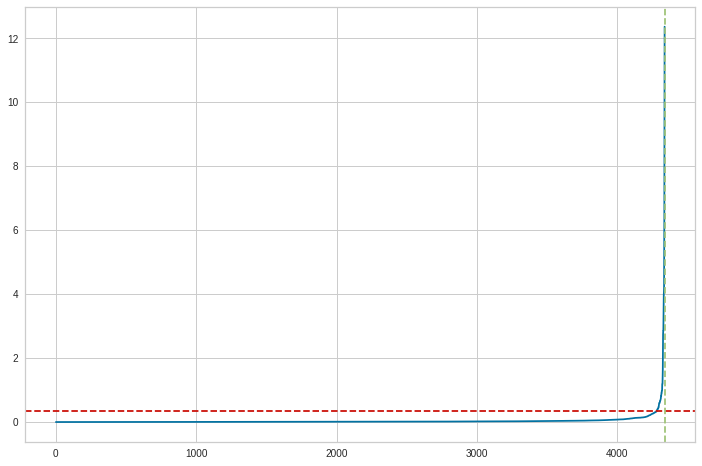

In [ ]:
plt.figure(figsize=(12,8))
distances_draw=distance[:,1]
plt.plot(distances_draw)
plt.axhline(y=0.34,color='r',linestyle='--')
plt.axvline(x=4338,color='g',linestyle='--')

In [ ]:
# Ta có thể thấy giá trị epsilon 0.32 thoả mãn điều kiện khi đường gạch đỏ đi ngang qua khu vực elbow của đồ thị 

In [ ]:
dbscan_model=DBSCAN(eps=0.34,min_samples=6)

In [ ]:
# Train model 
dbscan_model.fit(df_dbscan)

DBSCAN(eps=0.34, min_samples=6)

In [ ]:
# Assign each data point to cluster
dbscan_res=dbscan_model.fit_predict(df_dbscan)

In [ ]:
import collections, numpy 

In [ ]:
collections.Counter(dbscan_res)

Counter({-1: 93, 0: 4237, 1: 8})

In [ ]:
# Obtain all the unique clusters 
dbscan_clstrs=unique(dbscan_res)
dbscan_clstrs 

array([-1,  0,  1])

In [ ]:
 # Ta có thể thấy sự tập trung rõ ràng vào phân lớp 0 khi có tới 4237/4338 CustomerID => Model DBScan phân lớp không phù hợp cho bài toán này 

#V. Tổng kết 



1.   Trong 3 model phân lớp khách hàng được sử dụng 2 models RFC với K-Means cho kết quả tốt với phân nhóm khách hàng ra làm 4 nhất là K-Means với sự phân tách rõ ràng giữa các phân lớp 
2.   Model DBScan với hướng phân loại khách hàng làm 3 có sự tập trung hầu hết vào 1 phân lớp khi chiếm tới 4237/4338 cho không phù hợp với bài toán này 

